In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# load data
data = pd.read_csv('data/OULAD_cleaned_data.csv')
data.head()

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,6516,AAA,2014J,6350.0,100.0,48.055203,31.8,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,AAA_2014J
1,8462,DDD,2013J,3490.0,40.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,DDD_2013J
2,8462,DDD,2014J,4300.0,50.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,DDD_2014J
3,11391,AAA,2013J,8240.0,100.0,64.006980,41.2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
4,23629,BBB,2013B,1669.0,25.0,13.803681,8.3,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,BBB_2013B


In [3]:
# drop null 
data.dropna(inplace=True)
data.shape

(20290, 17)

In [ ]:
# bar charts
fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(111)

ax1.bar(data["highest_education"], data["final_result"])

plt.show()

In [ ]:
df_x = data["highest_education"].unique()
df_x

In [ ]:
df_x.size

In [ ]:
df_y = data["final_result"].unique()
df_y

In [ ]:
df_y.size

In [ ]:
df_y2 = list(set(data["final_result"]))
df_y2

In [ ]:
df_z = data.groupby("final_result")
df_z.describe()

In [5]:
df=data[["highest_education","final_result"]]
df

,highest_education,final_result
0,HE Qualification,Pass
3,HE Qualification,Pass
4,Lower Than A Level,Fail
5,A Level or Equivalent,Distinction
6,A Level or Equivalent,Distinction
...,...,...
25837,A Level or Equivalent,Distinction
25838,Lower Than A Level,Pass
25840,Lower Than A Level,Pass
25841,Lower Than A Level,Fail


In [ ]:
df.values

In [ ]:
df.value_counts()

In [ ]:
df["final_result"].count()

In [ ]:
df.groupby("highest_education")["final_result"].count()

In [ ]:
df.shape[0]

In [ ]:
temp = df.groupby("highest_education")["final_result"].count() /df.shape[0] * 100
temp

In [6]:
temp_df = df.groupby(["highest_education","final_result"])["final_result"].count()
# temp_df = df.groupby(["highest_education","final_result"])["final_result"].count().rename("count")
temp_df=temp_df.to_frame()
temp_df

final_result
highest_education           final_result              
A Level or Equivalent       Distinction           3013
                            Fail                  2019
                            Pass                  4330
HE Qualification            Distinction           1193
                            Fail                   577
                            Pass                  1342
Lower Than A Level          Distinction           1518
                            Fail                  2415
                            Pass                  3584
No Formal quals             Distinction             24
                            Fail                    67
                            Pass                    67
Post Graduate Qualification Distinction             73
                            Fail                    27
                            Pass                    41

In [7]:
# export temp_df
pd.DataFrame(temp_df).to_csv("data/temp_df.csv")

In [8]:
temp_df = pd.read_csv('data/temp_df.csv')
temp_df.head()

,highest_education,final_result,count
0,A Level or Equivalent,Distinction,3013
1,A Level or Equivalent,Fail,2019
2,A Level or Equivalent,Pass,4330
3,HE Qualification,Distinction,1193
4,HE Qualification,Fail,577


In [16]:
temp_df.groupby('highest_education')['count'].transform("sum")

0     9362
1     9362
2     9362
3     3112
4     3112
5     3112
6     7517
7     7517
8     7517
9      158
10     158
11     158
12     141
13     141
14     141
Name: count, dtype: int64

In [17]:
# add percentage
temp_df['percentage'] = 100 * temp_df['count'] / temp_df.groupby('highest_education')['count'].transform("sum")

In [18]:
temp_df

,highest_education,final_result,count,percentage
0,A Level or Equivalent,Distinction,3013,32.183294
1,A Level or Equivalent,Fail,2019,21.565905
2,A Level or Equivalent,Pass,4330,46.250801
3,HE Qualification,Distinction,1193,38.335476
4,HE Qualification,Fail,577,18.541131
5,HE Qualification,Pass,1342,43.123393
6,Lower Than A Level,Distinction,1518,20.194226
7,Lower Than A Level,Fail,2415,32.127178
8,Lower Than A Level,Pass,3584,47.678595
9,No Formal quals,Distinction,24,15.189873


In [22]:
temp_df=temp_df.drop(["count"], axis=1)

temp_df.shape

(15, 3)

In [34]:
temp_df["highest_education"]=temp_df["highest_education"].replace({"No Formal quals":0, "Lower Than A Level":1, "A Level or Equivalent":2, "HE Qualification":3, "Post Graduate Qualification":4})
temp_df["final_result"]=temp_df["final_result"].replace({"Withdrawn":0,  "Fail":1,  "Pass":2, "Distinction":3})
temp_df

,highest_education,final_result,percentage
0,2,3,32.183294
1,2,1,21.565905
2,2,2,46.250801
3,3,3,38.335476
4,3,1,18.541131
5,3,2,43.123393
6,1,3,20.194226
7,1,1,32.127178
8,1,2,47.678595
9,0,3,15.189873


0     2
1     2
2     2
3     3
4     3
5     3
6     1
7     1
8     1
9     0
10    0
11    0
12    4
13    4
14    4
Name: highest_education, dtype: int64
0     3
1     1
2     2
3     3
4     1
5     2
6     3
7     1
8     2
9     3
10    1
11    2
12    3
13    1
14    2
Name: final_result, dtype: int64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
******
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
0     32.183294
1     21.565905
2     46.250801
3     38.335476
4     18.541131
5     43.123393
6     20.194226
7     32.127178
8     47.678595
9     15.189873
10    42.405063
11    42.405063
12    51.773050
13    19.148936
14    29.078014
Name: percentage, dtype: float64


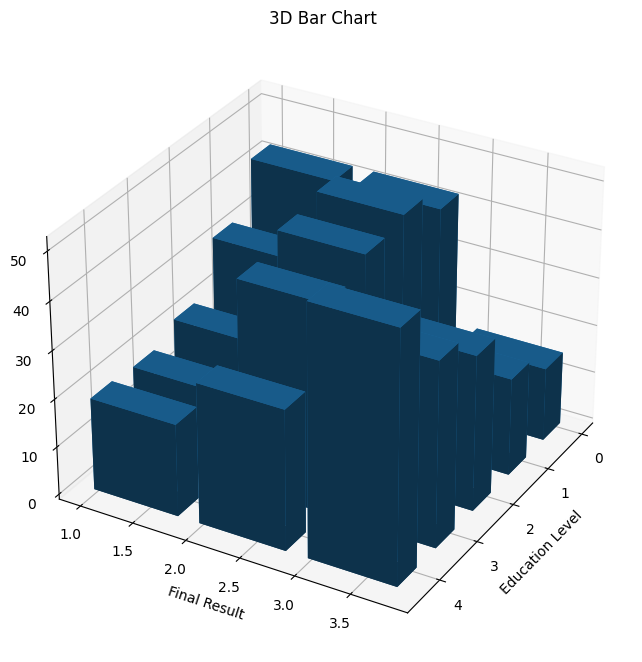

In [68]:
# analysing the relationship of education backgroud, IMD, and age band with final result

plt.figure(figsize=(8, 12))
ax = plt.axes(projection='3d')
length = len(temp_df)
X = temp_df['highest_education']
Y = temp_df['final_result']
Z = np.zeros(length)
print(X)
print(Y)
print(Z)
dx = np.ones(length) * .5
dy = np.ones(length) * .8
dz = temp_df["percentage"]
print("******")
print(dx)
print(dy)
print(dz)

# Plot the 3D bar chart
ax.bar3d(X, Y, Z, dx, dy, dz)

# ax.set_xticklabels(["No Formal quals", "Lower Than A Level", "A Level or Equivalent", "HE Qualification", "Post Graduate Qualification"])
# ax.set_yticklabels(["Fail",  "Pass", "Distinction"])

# Set labels and title
ax.set_xlabel('Education Level')
ax.set_ylabel('Final Result')
# ax.set_zlabel('Percentage')
ax.view_init(ax.elev, ax.azim+90)
plt.title('3D Bar Chart')

# Show the plot
plt.show()
